# Benchmarks

Study performance and scaling of algorithms in the pwlfit package.

### Imports

In [1]:
import time

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
try:
  import pwlfit
except ImportError:
  %pip install pwlfit

In [4]:
from pwlfit.util import generate_data, smooth_weighted_data
from pwlfit.fit import fitPrunedKnotsContinuous, fitPrunedKnotsDiscontinuous,fitFixedKnotsContinuous

## Scaling of Pruned Fit with Number of Initial Knots

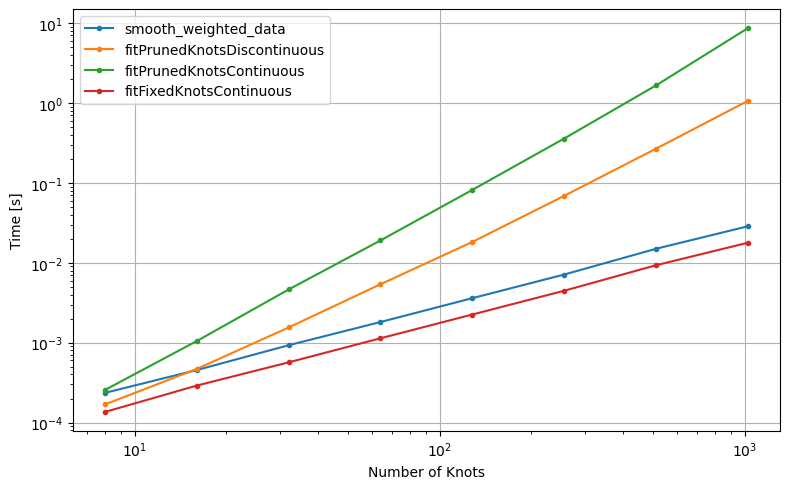

In [5]:
def prune_timing(nmin=8, nmax=1024, nsteps=8, maxsecs=0.5):

  def timeit(func, *args, **kwargs):
    ntrial = 0
    elapsed = 0
    while True:
      start = time.time()
      func(*args, **kwargs)
      elapsed += time.time() - start
      ntrial += 1
      if elapsed >= maxsecs:
        break
    avg_time = elapsed / ntrial
    #print(f"Average time for {func.__name__} is {avg_time:.4f} seconds over {ntrial} trials.")
    return avg_time

  D = generate_data(ndata = 8 * nmax, ngrid = nmax, nknots = nmax // 8)
  ngrid = np.geomspace(nmin, nmax, nsteps)
  times = [ ]
  for n in ngrid:

    iknots = np.arange(n).astype(int)
    yknots = smooth_weighted_data(D.ydata, D.ivar, D.grid, iknots)

    times.append([
      timeit(smooth_weighted_data, D.ydata, D.ivar, D.grid, iknots),
      timeit(fitPrunedKnotsDiscontinuous, D.ydata, D.ivar, D.grid, iknots, fit=False),
      timeit(fitPrunedKnotsContinuous, D.ydata, D.ivar, D.grid, yknots, iknots, fit=False),
      timeit(fitFixedKnotsContinuous, D.ydata, D.ivar, D.grid, iknots, fit=False),
    ])

  times = np.array(times)
  fig, ax = plt.subplots(figsize=(8, 5))
  for i, method in enumerate([
    'smooth_weighted_data',
    'fitPrunedKnotsDiscontinuous', 'fitPrunedKnotsContinuous', 'fitFixedKnotsContinuous'
    ]):
    ax.plot(ngrid, times[:,i], '.-', label=method)
  ax.set(xscale='log', yscale='log', xlabel='Number of Knots', ylabel='Time [s]')
  ax.grid()
  ax.legend()
  plt.tight_layout()
  plt.savefig('prune_timing.png')

prune_timing()